In [97]:
import math
import pandas as pd
import joblib
import numpy as np
# from numpy.random import seed seed(1) 
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

import tensorflow
from sklearn.preprocessing import MinMaxScaler 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, LSTM 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import statsmodels.formula.api as smf




%matplotlib inline

In [98]:
df = pd.read_csv('final_yield.csv')
df

,county,year,ha,mt,mt/ha,name
0,Baringo,2012,17196.0,7104.42,0.410000,beans
1,Bomet,2012,19138.0,11212.20,0.590000,beans
2,Bungoma,2012,61715.0,38130.30,0.620000,beans
3,Busia,2012,19245.0,9544.50,0.500000,beans
4,Elgeyo Marakwet,2012,20241.0,17841.69,0.880000,beans
...,...,...,...,...,...,...
540,Kirinyaga,2015,90.0,318.00,3.533333,grapes
541,Kisii,2015,76.0,348.00,4.578947,grapes
542,Kisumu,2015,90.0,318.00,3.533333,grapes
543,Kitui,2015,36.0,318.00,8.833333,grapes


<AxesSubplot: >

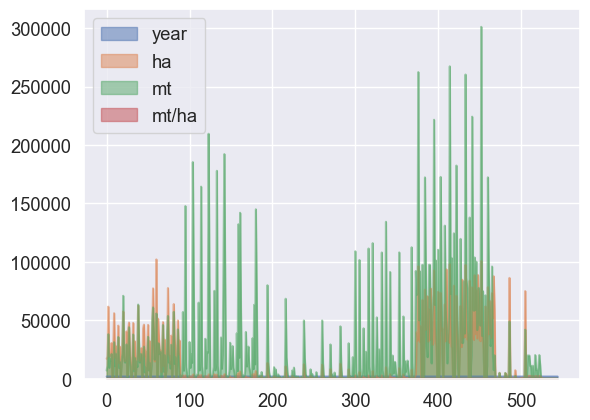

In [99]:
df.plot.area(stacked=False)

In [100]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   county  545 non-null    object 
 1   year    545 non-null    int64  
 2   ha      545 non-null    float64
 3   mt      545 non-null    float64
 4   mt/ha   545 non-null    float64
 5   name    545 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 25.7+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_8716\147289282.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

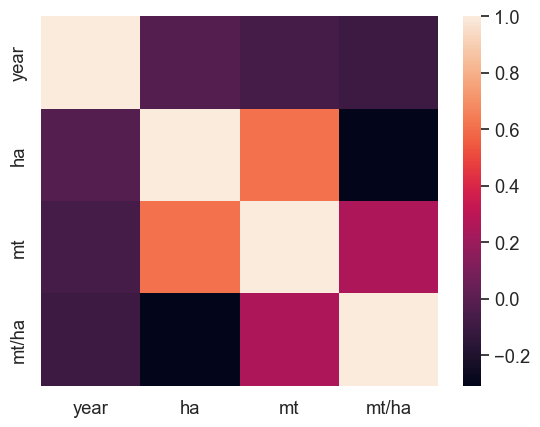

In [101]:
# df = df.drop(['Unnamed: 6'], axis=1)
sns.heatmap(df.corr())

In [102]:

# dataset = df.values

# X = df[['year','ha','mt/ha','mt']]
# y = df[['name']]

# dataset
data = df
y1 = np.array(data[['mt']])


In [103]:
from sklearn.feature_extraction import DictVectorizer

cols = data[['county','name']]
mapping = {}

for col in cols:
  
  mapping[col] = {name: i for i, name in enumerate(data[col].unique())}
def mapping_func(row):
  return pd.Series([mapping[col][row[col]] for col in cols])


x1 = data.apply(mapping_func, axis=1)
y = data[['year']]
h = data[['ha']]
mt_ha = data[['mt/ha']]
x1.insert(loc=0,column=4,value=y)
x1.insert(loc=2,column=2,value=h)
x1.insert(loc=3,column=3,value=mt_ha)
x1 


,4,0,2,3,1
0,2012,0,17196.0,0.410000,0
1,2012,1,19138.0,0.590000,0
2,2012,2,61715.0,0.620000,0
3,2012,3,19245.0,0.500000,0
4,2012,4,20241.0,0.880000,0
...,...,...,...,...,...
540,2015,13,90.0,3.533333,7
541,2015,14,76.0,4.578947,7
542,2015,15,90.0,3.533333,7
543,2015,16,36.0,8.833333,7


<AxesSubplot: >

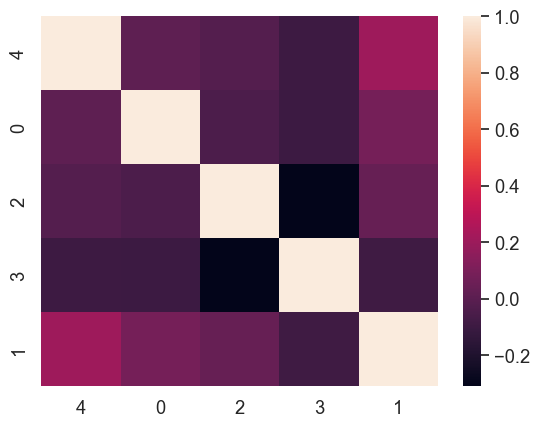

In [104]:
sns.heatmap(x1.corr())

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x1, y1)
X_train

,4,0,2,3,1
27,2014,9,48126.0,0.92,0
22,2014,4,14894.0,0.94,0
59,2015,5,23191.0,1.18,0
326,2013,17,2636.0,19.94,3
292,2016,7,8118.0,3.75,2
...,...,...,...,...,...
332,2014,5,3044.0,35.51,3
457,2016,19,61940.0,1.15,4
141,2014,12,1958.0,52.21,1
310,2012,17,2136.0,20.22,3


In [106]:
y_train = np.reshape(y_train, (-1,1))
y_val = np.reshape(y_val, (-1,1))

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale = scaler_x.transform(X_train)
scaler_x.fit(X_val)
xval_scale = scaler_x.transform(X_val) 

scaler_y.fit(y_train)
ytrain_scale = scaler_y.transform(y_train) 
scaler_y.fit(y_val) 
yval_scale = scaler_y.transform(y_val)
# l = np.array([[17196,0,0,0]])
# # l.reshape(1,-1)
# scaler_x.fit(l)
# l = scaler_x.transform(l)
# # print(l)
# scaler_y.inverse_transform(l)


In [107]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_features1 = PolynomialFeatures(degree=2)
x_poly1 = polynomial_features1.fit_transform(X_train)
model1 = LinearRegression()
model1.fit(x_poly1, y_train)
y_poly_pred1 = model1.predict(x_poly1)

In [108]:
x_poly1.shape

(408, 21)

In [109]:
from sklearn.metrics import mean_squared_error, r2_score

rmse1 = np.sqrt(mean_squared_error(y_train,y_poly_pred1))
r21 = r2_score(y_train, y_poly_pred1)
print(rmse1)
print(r21)

86.28207874365883
0.9999963352323221


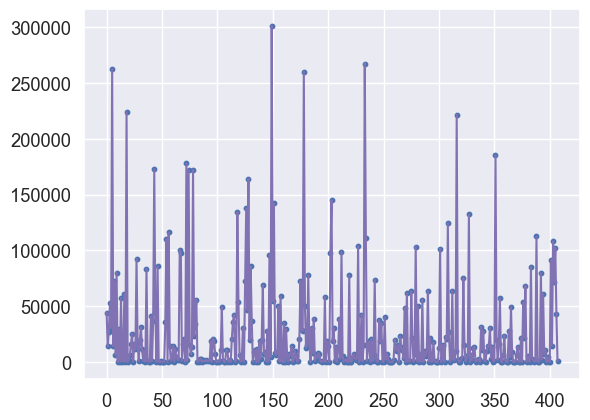

In [110]:
import operator
xm = np.arange(0, len(X_train),1)
plt.scatter(xm, y_train,s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(xm, y_poly_pred1), key=sort_axis)
xm, y_poly_pred1 = zip(*sorted_zip)
plt.plot(xm, y_poly_pred1, color='m')
plt.show()

In [111]:
model = Sequential()
model.add(Dense(5, input_dim=5, kernel_initializer='normal',activation='relu'))
model.add(Dense(99,activation='relu'))
model.add(Dense(1, activation='linear')) 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 30        
                                                                 
 dense_10 (Dense)            (None, 99)                594       
                                                                 
 dense_11 (Dense)            (None, 1)                 100       
                                                                 
Total params: 724
Trainable params: 724
Non-trainable params: 0
_________________________________________________________________


In [112]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae']) 
history = model.fit(xtrain_scale, ytrain_scale, epochs=100, batch_size=150, verbose=1, validation_split=0.2) 
predictions = model.predict(xval_scale)

Epoch 1/100
3/3 [==============================] - 8s 817ms/step - loss: 0.0332 - mse: 0.0332 - mae: 0.0942 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.0664
Epoch 2/100
3/3 [==============================] - 0s 152ms/step - loss: 0.0283 - mse: 0.0283 - mae: 0.0825 - val_loss: 0.0145 - val_mse: 0.0145 - val_mae: 0.0725
Epoch 3/100
3/3 [==============================] - 0s 161ms/step - loss: 0.0253 - mse: 0.0253 - mae: 0.0858 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0821
Epoch 4/100
3/3 [==============================] - 1s 254ms/step - loss: 0.0239 - mse: 0.0239 - mae: 0.0934 - val_loss: 0.0142 - val_mse: 0.0142 - val_mae: 0.0915
Epoch 5/100
3/3 [==============================] - 0s 206ms/step - loss: 0.0234 - mse: 0.0234 - mae: 0.1006 - val_loss: 0.0148 - val_mse: 0.0148 - val_mae: 0.0989
Epoch 6/100
3/3 [==============================] - 0s 182ms/step - loss: 0.0234 - mse: 0.0234 - mae: 0.1061 - val_loss: 0.0152 - val_mse: 0.0152 - val_mae: 0.1029
Epoch 7/100
3/3 [=====

In [113]:
def crop_yield_prediction():

    print("Input year")
    year = input()
    year = int(year)
    print("input county")
    county = input()



    
    print("Input HA")
    ha = input()
    ha = int(ha)


    print("input MT/HA")
    mt_ha = input()
    mt_ha = float(mt_ha)

    print("input name")
    name = input()

    v = [[year,mapping['county'][county],ha,mt_ha,mapping['name'][name]]]
    v = polynomial_features1.fit_transform(v)
    
    

    print(county,ha, mt_ha,name)
    # v = scaler_x.transform([[mapping['county'][county],ha,mt_ha,mapping['name'][name]]]]) 


    crop_yield = model1.predict(v)
    # crop_yield = scaler_y.inverse_transform(crop_yield) 
    
    print(crop_yield)

In [114]:
# crop_yield_prediction()

In [115]:
joblib.dump(model1, 'final_yield.pkl')

['final_yield.pkl']

In [116]:
joblib.dump(polynomial_features1, 'poly_reg.pkl')

['poly_reg.pkl']

In [117]:
%store mapping

Stored 'mapping' (dict)


In [118]:
# import tensorflow as tf 


# n = ([mapping])


In [ ]:
# model.save('finalYield.h5')